## Caso de estudio

- Dataset original: https://www.kaggle.com/datasets/ravichan76/leadscore?resource=download

- LeadScoringAI by Human Trends: https://leadscoring.ai

## Presentación del problema

X Education es una empresa de educación que vende cursos en línea para profesionales de la industria. Su sitio web recibe diariamente a muchas personas interesadas en estos cursos, quienes pueden navegar por la oferta, completar formularios o ver videos.

La empresa promociona sus cursos a través de sitios web y motores de búsqueda como Google. Cuando un visitante llena un formulario con su correo electrónico o número de teléfono, se clasifica como un lead. Además, también obtienen leads a través de referencias previas. Luego, el equipo de ventas se encarga de contactar a estos leads mediante llamadas y correos electrónicos. Sin embargo, solo un 30% de los leads se convierten en clientes.

Dado que se generan muchos leads, pero solo una parte se convierte en clientes de pago, es clave nutrir a los leads más prometedores mediante educación y comunicación constante para aumentar la tasa de conversión.

## Problema a resolver:
X Education necesita un modelo que asigne un lead score a cada prospecto, permitiendo identificar los más propensos a convertirse en clientes. El objetivo es mejorar la conversión, buscando alcanzar un 80% según las expectativas del CEO.

## Objetivos del estudio
- Estudiar los datos a través de un EDA (Análisis Exploratorio de Datos):
  - Carga de datos
  - Información básica del dataset
  - Estadística descriptiva
  - Matriz de correlación entre variables
  - Inspección de características
  - <b>Conclusión: asegurarnos de entender bien la naturaleza del problema y de los datos.</b>

- Preprocesar las variables
  - Manejo de valores faltantes (missing values)
  - Estudio y manejo de variables
  - Detección y tratamiento de valores atípicos (outliers)
  - Codificación de variables categóricas
  - Ingeniería de características (feature engineering)
  - <b>Conclusión: asegurar que enriquecimos y preparamos adecuadamente el dataset</b>

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np # operaciones matematicas
import pandas as pd # manipular datos
import matplotlib.pyplot as plt # graficas
import seaborn as sns # graficas
sns.set(style="darkgrid")
%matplotlib inline

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
#### Funciones auxiliares ######
def porcentaje_nulos(dataframe):
    # Calcula el porcentaje de valores nulos en cada columna
    porcentaje_nas = (dataframe.isnull().mean() * 100).round(2)

    # Convierte la información a un diccionario
    dict_nulos = porcentaje_nas.to_dict()

    return dict_nulos

def eliminar_columnas_con_nulos(df, umbral=0.15):

    # Calcula el porcentaje de valores nulos por columna
    porcentaje_nulos = df.isnull().mean()

    # Filtra las columnas que tienen menos del umbral de valores nulos
    columnas_a_mantener = porcentaje_nulos[porcentaje_nulos <= (1 - umbral)].index

    # Crea un nuevo DataFrame con las columnas seleccionadas
    df_resultante = df[columnas_a_mantener].copy()

    return df_resultante

# EDA

## Paso 1: Leemos los datos

In [ ]:
leads_df = pd.read_csv('/content/Leads.csv')

## Paso 2: Estudiamos información básica del dataset

In [ ]:
# nos fijamos las dimensiones del dataset
leads_df.shape

(9240, 37)

In [ ]:
# inspeccionamos datos
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Paso 3: Estudiamos estadística descriptiva del dataset

In [ ]:
# variables numéricas
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
# variables categóricas
leads_df.describe(include='object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


## Paso 4: Matriz de correlación entre variables

In [ ]:
leads_df.corr(numeric_only=True)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
Lead Number,1.000000,0.025157,0.022223,0.020329,0.058808,-0.067982,-0.129124
Converted,0.025157,1.000000,0.030395,0.362483,-0.003328,0.167962,0.218571
TotalVisits,0.022223,0.030395,1.000000,0.221240,0.512125,-0.058514,0.130887
Total Time Spent on Website,0.020329,0.362483,0.221240,1.000000,0.320361,-0.065287,0.175589
Page Views Per Visit,0.058808,-0.003328,0.512125,0.320361,1.000000,-0.162892,0.161254
Asymmetrique Activity Score,-0.067982,0.167962,-0.058514,-0.065287,-0.162892,1.000000,-0.123250
Asymmetrique Profile Score,-0.129124,0.218571,0.130887,0.175589,0.161254,-0.123250,1.000000


In [ ]:
leads_df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
Lead Number,1.000000,0.025157,0.022223,0.020329,0.058808,-0.067982,-0.129124
Converted,0.025157,1.000000,0.030395,0.362483,-0.003328,0.167962,0.218571
TotalVisits,0.022223,0.030395,1.000000,0.221240,0.512125,-0.058514,0.130887
Total Time Spent on Website,0.020329,0.362483,0.221240,1.000000,0.320361,-0.065287,0.175589
Page Views Per Visit,0.058808,-0.003328,0.512125,0.320361,1.000000,-0.162892,0.161254
Asymmetrique Activity Score,-0.067982,0.167962,-0.058514,-0.065287,-0.162892,1.000000,-0.123250
Asymmetrique Profile Score,-0.129124,0.218571,0.130887,0.175589,0.161254,-0.123250,1.000000


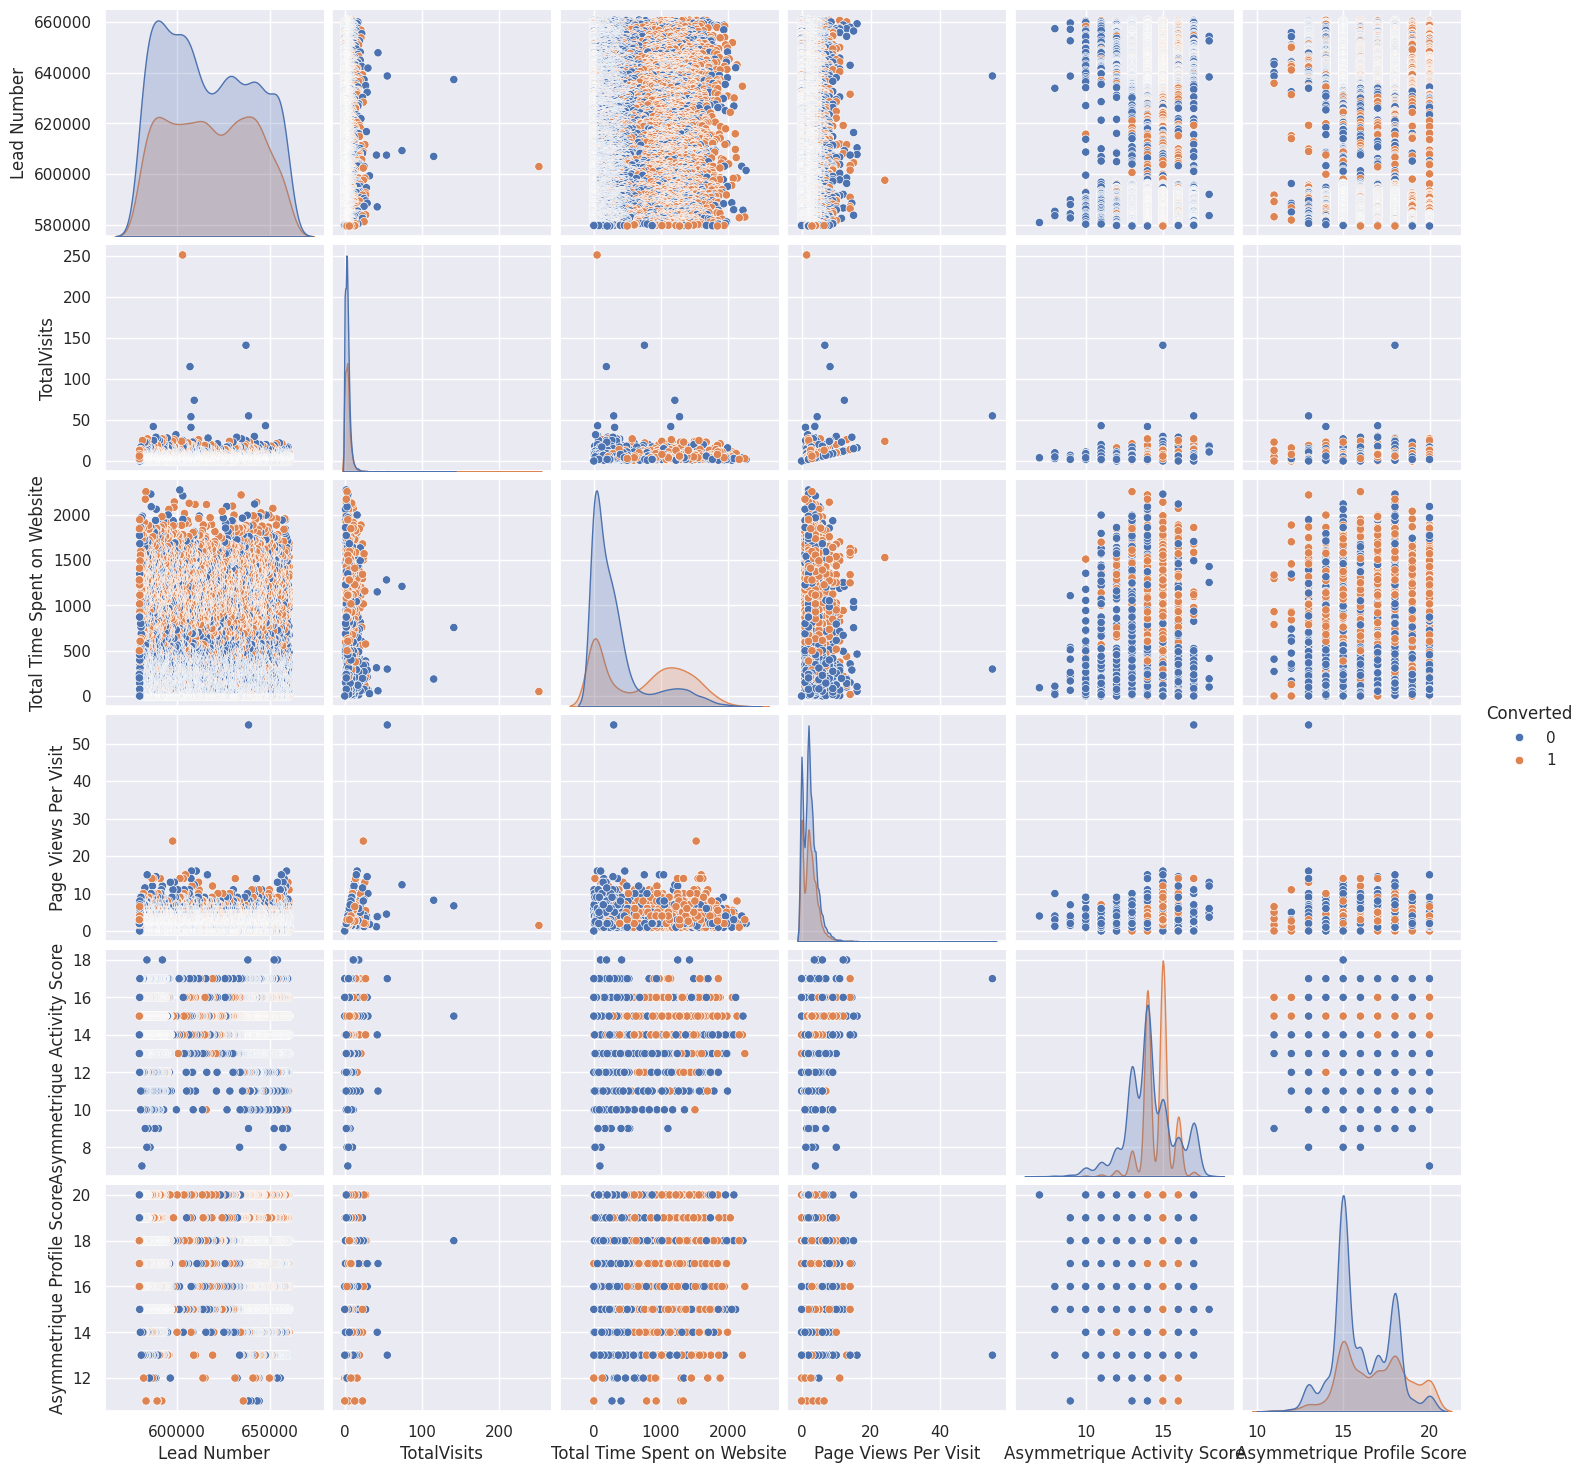

In [ ]:
sns.pairplot(data=leads_df, hue="Converted")

## Paso 5: Inspección de características

In [ ]:
# % de valores perdidos por variable
porcentaje_nulos(leads_df)

{'Prospect ID': 0.0,
 'Lead Number': 0.0,
 'Lead Origin': 0.0,
 'Lead Source': 0.39,
 'Do Not Email': 0.0,
 'Do Not Call': 0.0,
 'Converted': 0.0,
 'TotalVisits': 1.48,
 'Total Time Spent on Website': 0.0,
 'Page Views Per Visit': 1.48,
 'Last Activity': 1.11,
 'Country': 26.63,
 'Specialization': 15.56,
 'How did you hear about X Education': 23.89,
 'What is your current occupation': 29.11,
 'What matters most to you in choosing a course': 29.32,
 'Search': 0.0,
 'Magazine': 0.0,
 'Newspaper Article': 0.0,
 'X Education Forums': 0.0,
 'Newspaper': 0.0,
 'Digital Advertisement': 0.0,
 'Through Recommendations': 0.0,
 'Receive More Updates About Our Courses': 0.0,
 'Tags': 36.29,
 'Lead Quality': 51.59,
 'Update me on Supply Chain Content': 0.0,
 'Get updates on DM Content': 0.0,
 'Lead Profile': 29.32,
 'City': 15.37,
 'Asymmetrique Activity Index': 45.65,
 'Asymmetrique Profile Index': 45.65,
 'Asymmetrique Activity Score': 45.65,
 'Asymmetrique Profile Score': 45.65,
 'I agree to pay

In [ ]:
# Nos fijamos si hay duplicados
leads_df.loc[leads_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [ ]:
leads_df.Converted.value_counts(normalize=True) * 100 # 0 no convertido, 1 convertido

,proportion
Converted,
0,61.461039
1,38.538961


## Conclusiones relevantes del EDA básico

- La forma del conjunto de datos de leads es de 9.240 filas y 37 columnas.
- Hay 7 columnas numéricas y 30 columnas categóricas.
- Hay valores faltantes/nulos en varias columnas.
- No hay valores duplicados en el conjunto de datos.
- La tasa de conversión de los leads es del 38.54%.
- Variable objetivo: Converted, problema binario de clasificación.
- Clases un poco desbalanceadas (No mucho)
- En muchos casos existe una categoría "Select" que representa un valor faltante. Esto viene dado por el CRM (Customer Relationship Management) utilizado ya que no seleccionarion la opción. Tendremos que arreglarlo en el preprocesamiento.

# Preprocesamiento de datos y limpieza

## Paso 1: Manejo de valores faltantes

In [ ]:
# Reemplazamos los 'Select' por NaN para tratarlos como 'missing values'
leads_df = leads_df.replace('Select', np.nan)

In [ ]:
# volvemos a ver el % de valores perdidos por columna
porcentaje_nulos(leads_df)

{'Prospect ID': 0.0,
 'Lead Number': 0.0,
 'Lead Origin': 0.0,
 'Lead Source': 0.39,
 'Do Not Email': 0.0,
 'Do Not Call': 0.0,
 'Converted': 0.0,
 'TotalVisits': 1.48,
 'Total Time Spent on Website': 0.0,
 'Page Views Per Visit': 1.48,
 'Last Activity': 1.11,
 'Country': 26.63,
 'Specialization': 36.58,
 'How did you hear about X Education': 78.46,
 'What is your current occupation': 29.11,
 'What matters most to you in choosing a course': 29.32,
 'Search': 0.0,
 'Magazine': 0.0,
 'Newspaper Article': 0.0,
 'X Education Forums': 0.0,
 'Newspaper': 0.0,
 'Digital Advertisement': 0.0,
 'Through Recommendations': 0.0,
 'Receive More Updates About Our Courses': 0.0,
 'Tags': 36.29,
 'Lead Quality': 51.59,
 'Update me on Supply Chain Content': 0.0,
 'Get updates on DM Content': 0.0,
 'Lead Profile': 74.19,
 'City': 39.71,
 'Asymmetrique Activity Index': 45.65,
 'Asymmetrique Profile Index': 45.65,
 'Asymmetrique Activity Score': 45.65,
 'Asymmetrique Profile Score': 45.65,
 'I agree to pay

Existen variables con un alto grado de missing values:
  - 'How did you hear about X Education' ~ 78%
  - 'Lead Profile' ~ 74%

Estas es mejor eliminarlas ya que si utilizamos algún método de imputación podemos estar incurriendo en sesgos a la hora de decidir.

Luego vienen otras con menos, pero aun así bastantes:
  - 'Country' ~ 27%
  - 'What is your current occupation' ~ 29%
  - 'What matters most to you in choosing a course' ~ 29%
  - 'Lead Quality' ~ 52%
  - 'City' ~ 40%
  - 'Asymmetrique Activity Index' ~ 46%
  - 'Asymmetrique Profile Index' ~ 46%
  - 'Asymmetrique Activity Score' ~ 46%
  - 'Asymmetrique Profile Score' ~ 46%
  - 'Tags' ~ 36%
  - 'Specialization' ~ 37%

In [ ]:
# estudiamos en detalle las variables para entender de qué forma será mejor imputarlas
leads_df['Lead Profile'].value_counts()

,count
Lead Profile,
Potential Lead,1613
Other Leads,487
Student of SomeSchool,241
Lateral Student,24
Dual Specialization Student,20


In [ ]:
leads_df['How did you hear about X Education'].value_counts()

,count
How did you hear about X Education,
Online Search,808
Word Of Mouth,348
Student of SomeSchool,310
Other,186
Multiple Sources,152
Advertisements,70
Social Media,67
Email,26
SMS,23


Las podemos eliminar, son variables que dan información similar a 'Lead Source' y 'Lead Origin'

In [ ]:
# las eliminamos
leads_df = leads_df.drop(['Lead Profile',
                         'How did you hear about X Education'], axis=1)

Ahora estudiamos las que tienen 46% de missing values, parecen bastante similares

<Axes: ylabel='Density'>

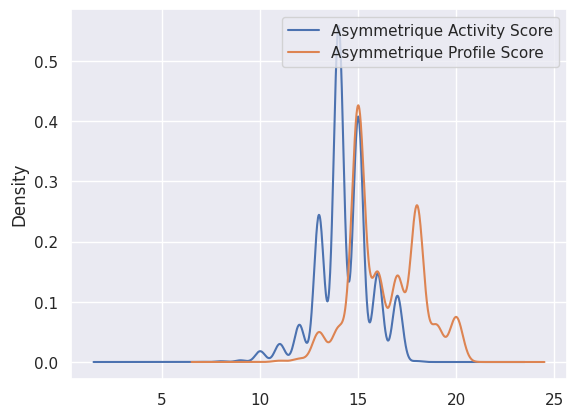

In [ ]:
leads_df[['Asymmetrique Activity Score', 'Asymmetrique Profile Score']].plot(kind='kde')

In [ ]:
leads_df['Asymmetrique Activity Index'].value_counts()

,count
Asymmetrique Activity Index,
02.Medium,3839
01.High,821
03.Low,362


In [ ]:
leads_df['Asymmetrique Profile Index'].value_counts()

,count
Asymmetrique Profile Index,
02.Medium,2788
01.High,2203
03.Low,31


In [ ]:
# vemos data quality (también tiene un % alto)
leads_df['Lead Quality'].value_counts()

,count
Lead Quality,
Might be,1560
Not Sure,1092
High in Relevance,637
Worst,601
Low in Relevance,583


Pueden llegar a ser variables útiles, pero siguen teniendo un gran % de missing values.

Hay varios procesos que se pueden hacer:
  - Imputar valores numéricos a través de métricas estadísticas como mediana, moda, etc. Pero al ser tanto el % puede incurrir en sesgos en un futuro modelo.
  - Imputar categóricas inventando una variable "Otro" o "Desconocido", pero tampoco es muy recomendable con % de valores más allá del 30%.

Para este caso práctico las eliminaremos.

El caso de 'Lead Quality' puede ser una variable muy interesante a tener en cuenta. Pero si la miramos con ojos críticos ya es casi un lead scoring en sí mismo. Si queremos un modelo objetivo, no nos conviene ser juiciosos de entrada. Queremos un modelo lo más objetivo posible, por lo que también la quitamos.

<b>Dejamos como ejercicio probar hacer un modelo con estas variables y ver cuánto cambia.</b>

In [ ]:
# las eliminamos
leads_df = leads_df.drop(columns=['Lead Quality',
                       'Asymmetrique Activity Index',
                       'Asymmetrique Profile Index',
                       'Asymmetrique Activity Score',
                       'Asymmetrique Profile Score'], axis = 1)

Las variables que nos quedan, las podemos imputar con técnicas simples pero eficientes, para poder trabajar con datos que no tengan missing values. Vamos a estudiar una a una.

In [ ]:
 leads_df['Country'].value_counts(normalize=True).head() * 100 # 95% de los datos son de India. Prácticamente es una variable única.

,proportion
Country,
India,95.766337
United States,1.017849
United Arab Emirates,0.781826
Singapore,0.354035
Saudi Arabia,0.309780


In [ ]:
 leads_df['City'].value_counts(normalize=True) * 100 # ~ 40% de missing values y principalmente son ciudades de India.

,proportion
City,
Mumbai,57.835218
Thane & Outskirts,13.498474
Other Cities,12.313768
Other Cities of Maharashtra,8.203195
Other Metro Cities,6.821038
Tier II Cities,1.328307


In [ ]:
 leads_df['What is your current occupation'].value_counts(normalize=True) # ya existe una clase 'Other' por lo que podemos imputar con esa

,proportion
What is your current occupation,
Unemployed,0.854962
Working Professional,0.107786
Student,0.032061
Other,0.002443
Housewife,0.001527
Businessman,0.001221


In [ ]:
leads_df['What matters most to you in choosing a course'].value_counts(normalize=True) # 99% de los datos son Better Career Prospects. Prácticamente es una variable única.

,proportion
What matters most to you in choosing a course,
Better Career Prospects,0.999541
Flexibility & Convenience,0.000306
Other,0.000153


De estas variables, la que más información útil arroja es 'What is your current occupation', la cual imputaremos sus missing values con la categoría 'Other'.

Las otras tres tienen en muchos valores en una categoría específica ('What matters most to you in choosing a course' y 'Country'), luego no aportan información útil. En cuanto a 'City', la gran mayoría de ellas arroja información sobre la India por lo que volvemos al mismo caso que comentamos anteriormente.

In [ ]:
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].fillna('Other')

In [ ]:
# eliminamos las otras
leads_df = leads_df.drop(['City',
                          'Country',
                          'What matters most to you in choosing a course'], axis=1)

Dentro del estudio de missing values con mayor % nos quedan las variables 'Tags' y 'Specialization'. Vamos a estudiarlas en detalle.

In [ ]:
leads_df['Tags'].value_counts(normalize=True) # esta bastante bien distribuido, puede aportar información útil

,proportion
Tags,
Will revert after reading the email,0.351962
Ringing,0.204349
Interested in other courses,0.087141
Already a student,0.078988
Closed by Horizzon,0.060812
switched off,0.040768
Busy,0.031595
Lost to EINS,0.029727
Not doing further education,0.024631


In [ ]:
leads_df['Specialization'].value_counts(normalize=True) # esta es la carrera que va a estudiar, puede agregar información útil o incurrir en sesgos (debate)

,proportion
Specialization,
Finance Management,0.166553
Human Resource Management,0.144710
Marketing Management,0.143003
Operations Management,0.085836
Business Administration,0.068771
IT Projects Management,0.062457
Supply Chain Management,0.059556
"Banking, Investment And Insurance",0.057679
Travel and Tourism,0.034642


'Tags' la imputaremos con una nueva categoría denominada 'Unknown'.

El caso de 'Specialization' se presta a debate, hay quiénes la agregarían por ser información útil y objetiva y hay quiénes no la agregarían por poder incurrir en sesgos de priorizar carreras por la frecuencia estadística de los usuarios.

En este caso, imputaremos 'Tags' y eliminaremos 'Specialization'.

<b>Como ejercicio se deja probar el modelo con 'Specialization' incluida</b>

In [ ]:
leads_df['Tags'] = leads_df['Tags'].fillna('Unknown')

In [ ]:
leads_df = leads_df.drop('Specialization', axis=1)

Nos quedan 4 variables con ~1% de missing values, utilizaremos unos métodos similares para imputarlas.

In [ ]:
leads_df['Lead Source'].value_counts(normalize=True) # al ser fuentes tan específicas, armaremos una categoróa 'Other'

,proportion
Lead Source,
Google,0.311604
Direct Traffic,0.276293
Olark Chat,0.190678
Organic Search,0.125380
Reference,0.058018
Welingak Website,0.015428
Referral Sites,0.013581
Facebook,0.005976
bing,0.000652


In [ ]:
leads_df['Last Activity'].value_counts(normalize=True) # de igual forma, pondremos una clase como 'Unknown' para los missing values

,proportion
Last Activity,
Email Opened,0.376163
SMS Sent,0.300427
Olark Chat Conversation,0.106490
Page Visited on Website,0.070045
Converted to Lead,0.046843
Email Bounced,0.035679
Email Link Clicked,0.029222
Form Submitted on Website,0.012696
Unreachable,0.010178


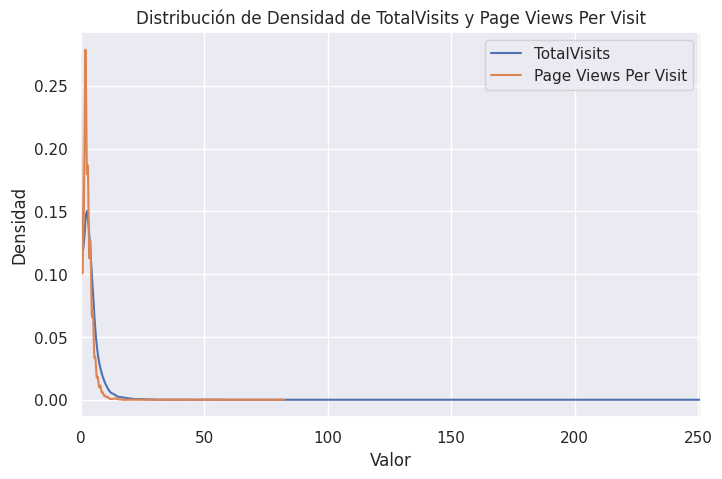

In [ ]:
# las otras dos variables son 'TotalVisits' y 'Page Views Per Visit', ambas numéricas. Luego imputaremos atendiendo a su distribución.
ax = leads_df[['TotalVisits', 'Page Views Per Visit']].plot(kind='kde', figsize=(8, 5))

x_min = leads_df[['TotalVisits', 'Page Views Per Visit']].min().min()
x_max = leads_df[['TotalVisits', 'Page Views Per Visit']].max().max()

# Ajustar el rango del eje X
ax.set_xlim(x_min, x_max)

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Distribución de Densidad de TotalVisits y Page Views Per Visit')

# Mostrar el gráfico
plt.show()

In [ ]:
leads_df[['TotalVisits', 'Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


Son variable con picos muy pronunciados en sus medianas y sus medias y medianas se aproximan bastante. Luego, imputaremos usando la media. Aunque bien se podría haber usado la mediana.

In [ ]:
# imputamos categóricas
leads_df['Last Activity'] = leads_df['Last Activity'].fillna('Unknown')
leads_df['Lead Source'] = leads_df['Lead Source'].fillna('Other')

In [ ]:
# imputamos numéricas
leads_df['TotalVisits'] = leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].mean()) # .median()
leads_df['Page Views Per Visit'] = leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].mean())

In [ ]:
# eliminamos Prospect Id ya que es una variable que distingue al lead, pero para eso tambien tenemos 'Lead Number'
leads_df = leads_df.drop('Prospect ID', axis=1)

In [ ]:
# volvemos a ver missing values
porcentaje_nulos(leads_df)

{'Lead Number': 0.0,
 'Lead Origin': 0.0,
 'Lead Source': 0.0,
 'Do Not Email': 0.0,
 'Do Not Call': 0.0,
 'Converted': 0.0,
 'TotalVisits': 0.0,
 'Total Time Spent on Website': 0.0,
 'Page Views Per Visit': 0.0,
 'Last Activity': 0.0,
 'What is your current occupation': 0.0,
 'Search': 0.0,
 'Magazine': 0.0,
 'Newspaper Article': 0.0,
 'X Education Forums': 0.0,
 'Newspaper': 0.0,
 'Digital Advertisement': 0.0,
 'Through Recommendations': 0.0,
 'Receive More Updates About Our Courses': 0.0,
 'Tags': 0.0,
 'Update me on Supply Chain Content': 0.0,
 'Get updates on DM Content': 0.0,
 'I agree to pay the amount through cheque': 0.0,
 'A free copy of Mastering The Interview': 0.0,
 'Last Notable Activity': 0.0}

## Paso 2: Estudio de variables monocategóricas

In [ ]:
# Chequeamos valores únicos por columna
leads_df.nunique()

,0
Lead Number,9240
Lead Origin,5
Lead Source,22
Do Not Email,2
Do Not Call,2
Converted,2
TotalVisits,42
Total Time Spent on Website,1731
Page Views Per Visit,115
Last Activity,18


Quitamos las que únicamente tenga un valor ya que no aportan información útil.

In [ ]:
# las eliminamos
leads_df = leads_df.drop(['Magazine',
                         'Receive More Updates About Our Courses',
                         'I agree to pay the amount through cheque',
                         'Get updates on DM Content',
                         'Update me on Supply Chain Content'], axis=1)

## Paso 3: estudio de variables que nos quedaron (estudio de outliers, ingeniería de características)

In [ ]:
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Habiendo limpiado los valores faltantes y quitado variables de poco interés, ahora procederemos a estudiar en detalle las variables que nos quedaron.

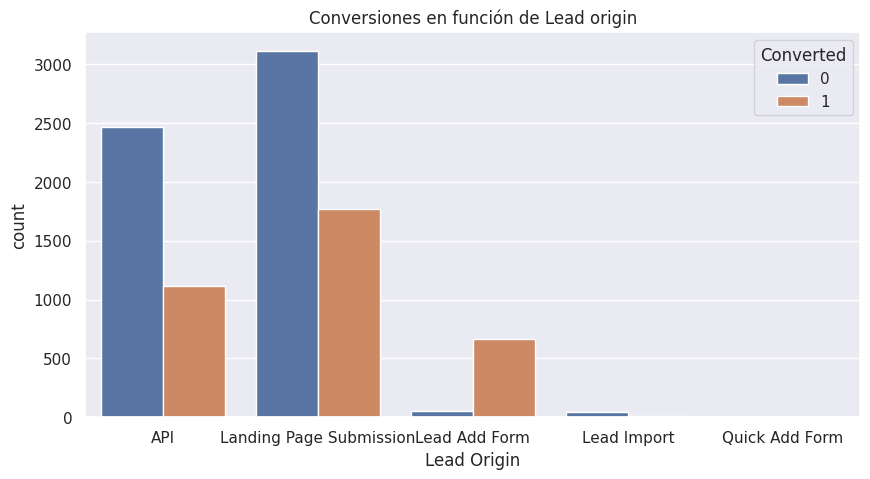

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_df) # sns es seaborn
plt.title("Conversiones en función de Lead origin")
plt.show()

- El **Formulario de Adición de Leads** tiene la tasa de conversión más alta.  
- **API y Envío desde Landing Page** tienen tasas de conversión no muy altas, pero generan la mayor cantidad de leads.  
- **La Importación de Leads** tiene la menor cantidad de conversiones y generación de leads.
- Para mejorar la tasa de conversión general de leads, se debe **enfocar en aumentar la conversión de la API y del Envío desde Landing Page**. Además, **generar más leads desde el Formulario de Adición de Leads**, ya que tiene una tasa de conversión muy alta.


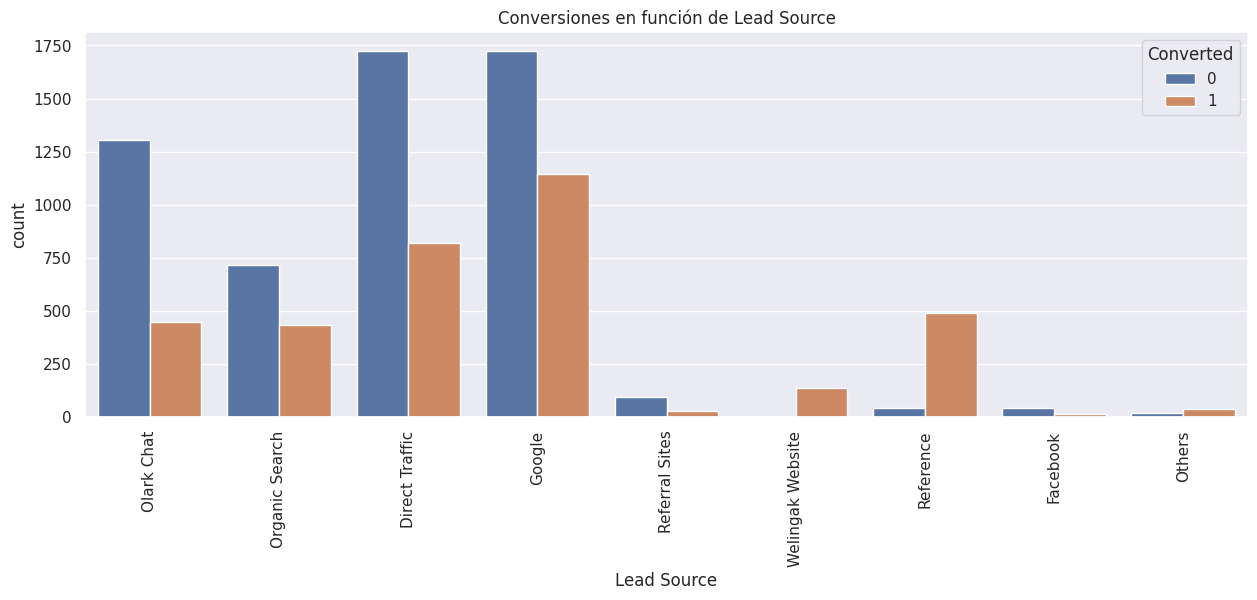

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_df)
plt.title("Conversiones en función de Lead Source")
plt.xticks(rotation=90)
plt.show()

- Muchas fuentes tienen pocos leads, por lo que sería prudente juntarlos en una única categoría común para agregar menos casuísticas al modelo. Será la categoría 'Others'.
- Además hay 2 categories 'Google', una con mayúscula y otra con minúscula, por lo que las juntaremos.



In [ ]:
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['google'], 'Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel', 'Other'], 'Others')

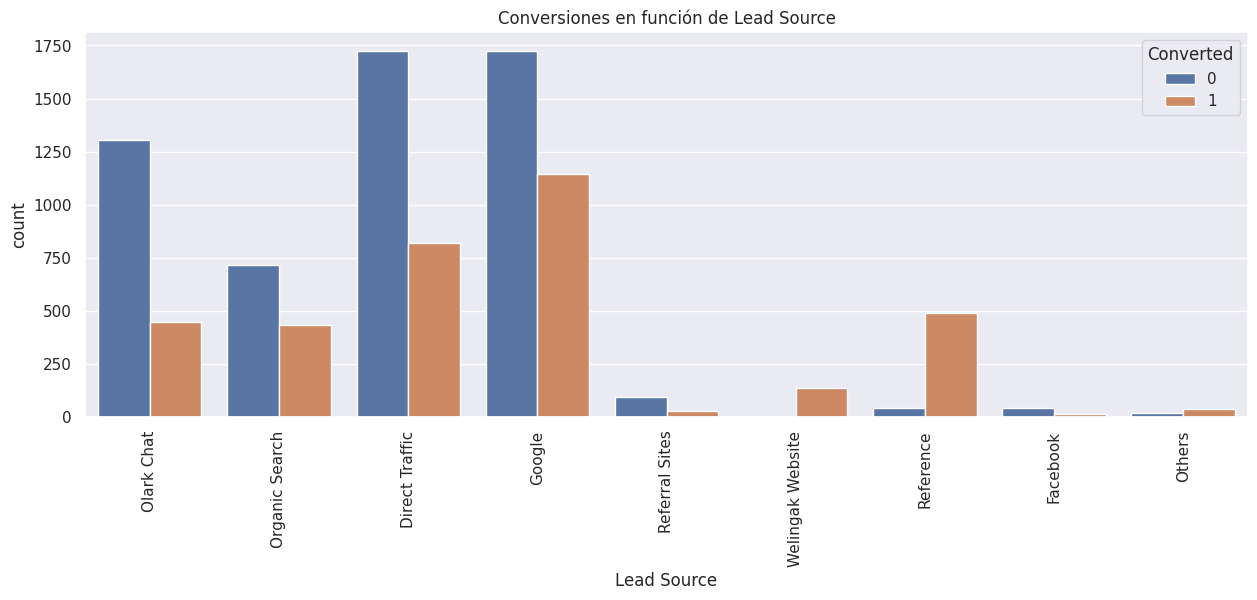

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_df)
plt.title("Conversiones en función de Lead Source")
plt.xticks(rotation=90)
plt.show()

- Google y direct traffic generates el máximo número de leads.
- Welingak website y References tienen el % de conversión más alto.
- olark chat y organic search generan un buen número de leads, pero no con buena conversión.
- Hay un buen margen de mejora, pero la información que aporta es útil.


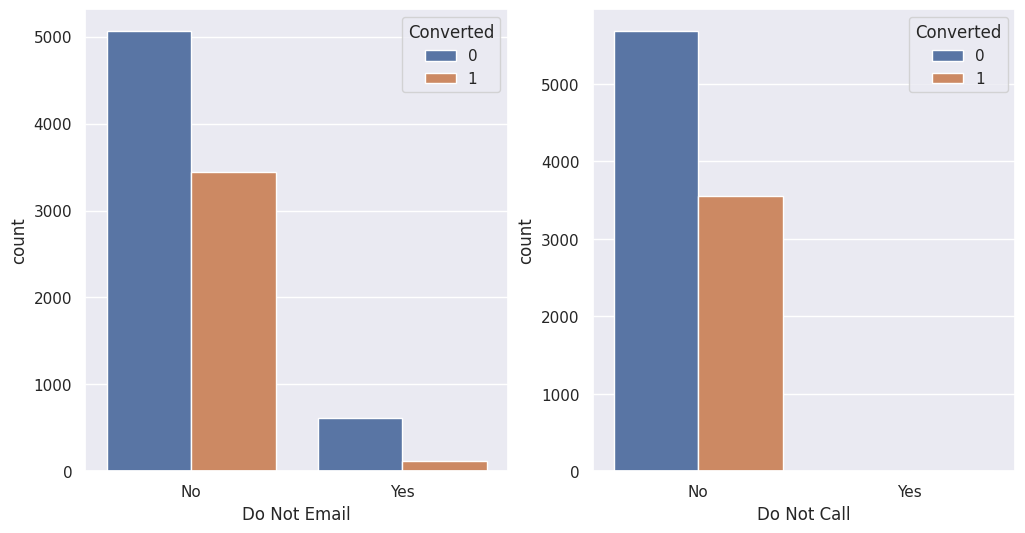

In [ ]:
fig, axs = plt.subplots(1,2,figsize = (12,6))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1])
plt.show()


In [ ]:
leads_df['Do Not Call'].value_counts(normalize=True) # prácticamente son todas 'No', información útil de negocio, pero redundante para el modelo.

,proportion
Do Not Call,
No,0.999784
Yes,0.000216


In [ ]:
leads_df = leads_df.drop('Do Not Call', axis=1)

- La mayoría de personas que les molesta que les envíen mail no terminan conviertiendo.
- En el caso contrario, vemos como el % de conversión aumenta.

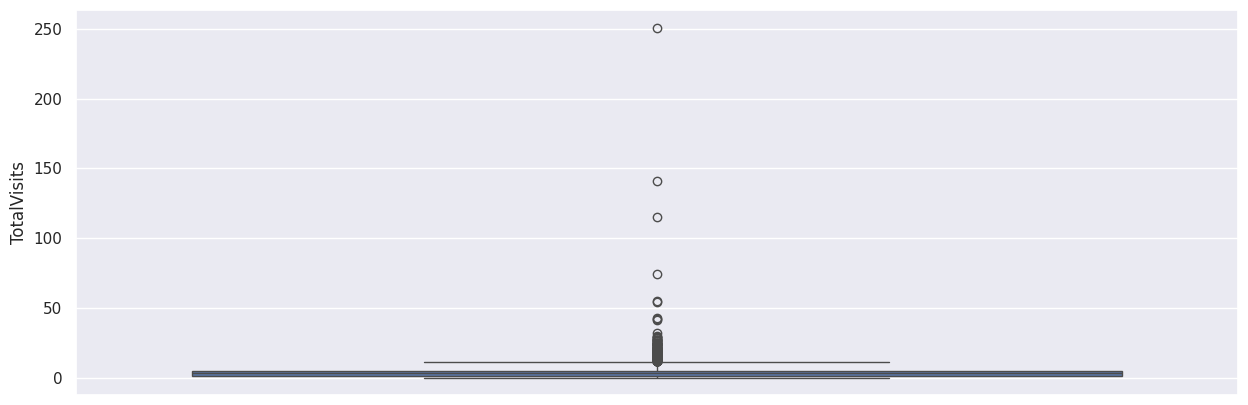

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(leads_df['TotalVisits'])
plt.show()

- Gran número de outliers. Distribución muy escorada a la izquierda, con una larga cola (outliers), Los vamos a reemplazar por la media, como los missing values. Aquellos que estén por encima del percetil 95.

In [ ]:
# Calcular el percentil 95 de la variable TotalVisits
percentil_95 = leads_df['TotalVisits'].quantile(0.95)

# Calcular la media de la variable TotalVisits (para reemplazar outliers)
media_total_visits = leads_df['TotalVisits'].mean() # median()

# Reemplazar valores por encima del percentil 95 con la media
leads_df['TotalVisits'] = np.where(leads_df['TotalVisits'] > percentil_95, media_total_visits, leads_df['TotalVisits'])

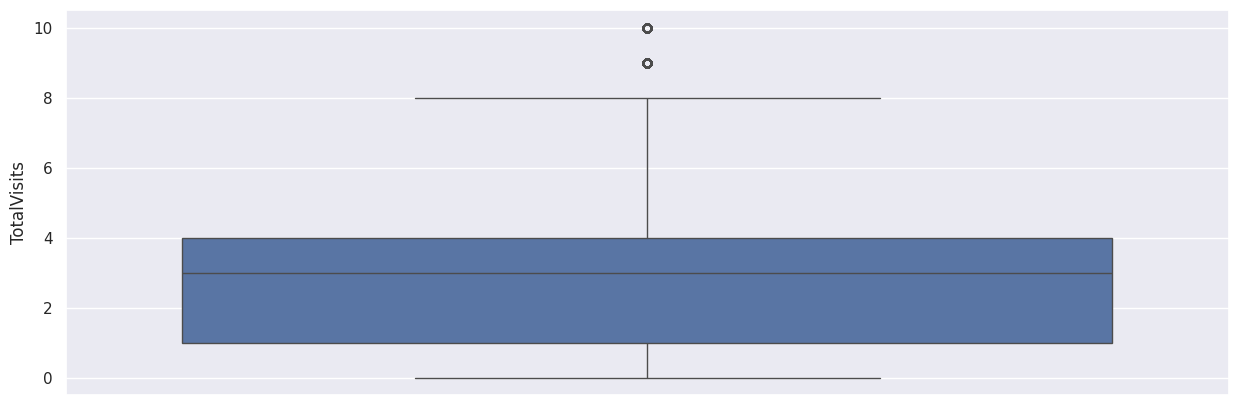

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(leads_df['TotalVisits'])
plt.show()

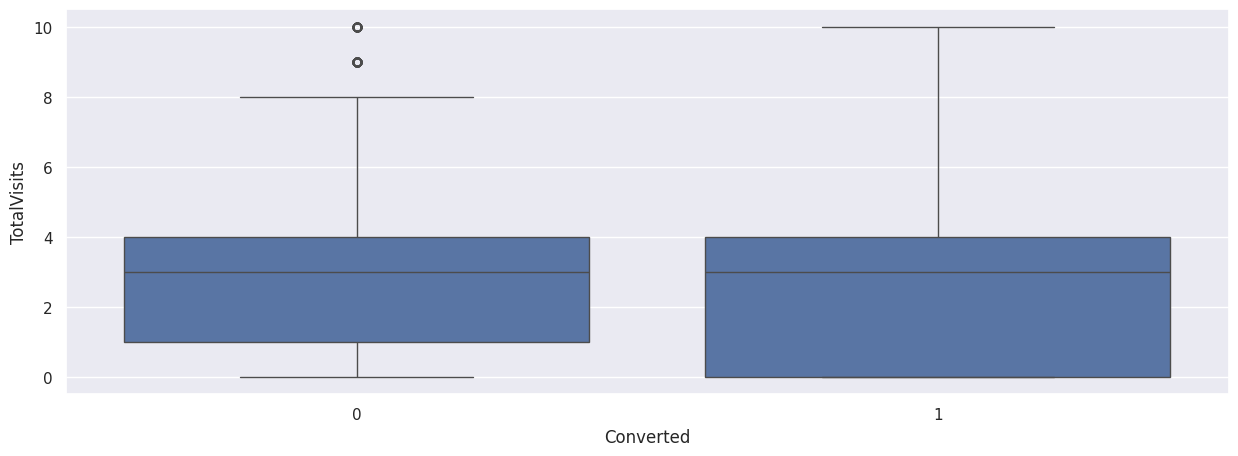

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.show()

- Medianas muy similares, poca diferencia en la influencia sobre las conversiones.

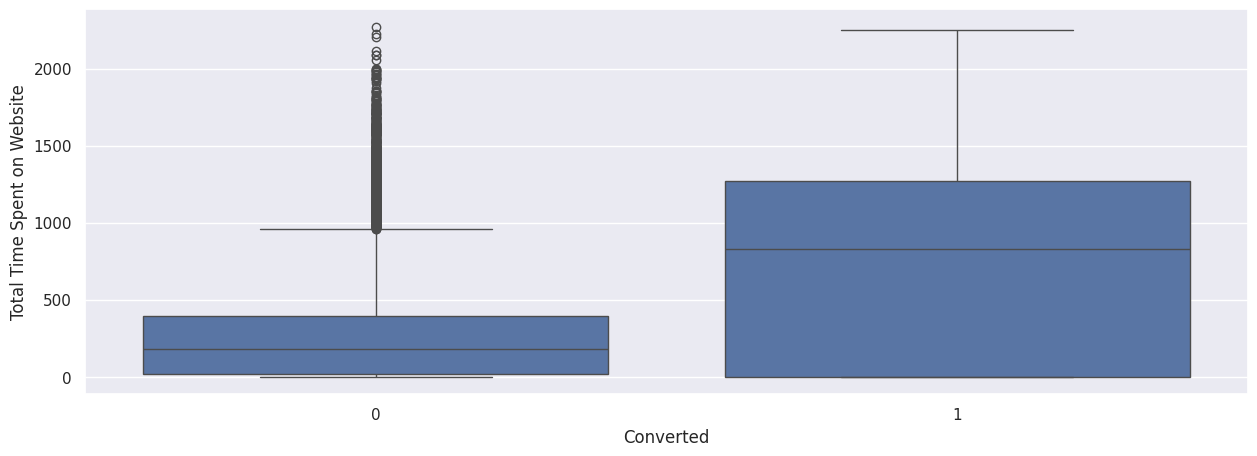

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

- Aquellos leads que pasan más tiempo en la web, tienen más chances de convertir, en este caso no los imputamos. Factor clave.


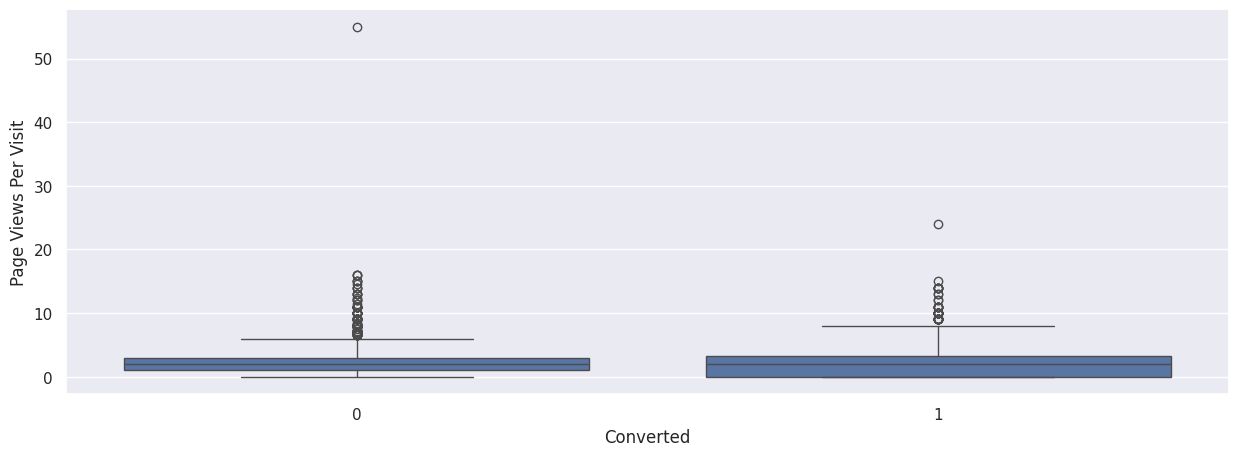

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

- Al igual que en anterior hay muchos outliers y podemos volver a imputar por la media.


In [ ]:
# Calcular el percentil 95 de la variable Page Views Per Visit
percentil_95 = leads_df['Page Views Per Visit'].quantile(0.95)

# Calcular la media de la variable Page Views Per Visit (para reemplazar outliers)
media_total_visits = leads_df['Page Views Per Visit'].mean()

# Reemplazar valores por encima del percentil 95 con la media
leads_df['Page Views Per Visit'] = np.where(leads_df['Page Views Per Visit'] > percentil_95, media_total_visits, leads_df['Page Views Per Visit'])

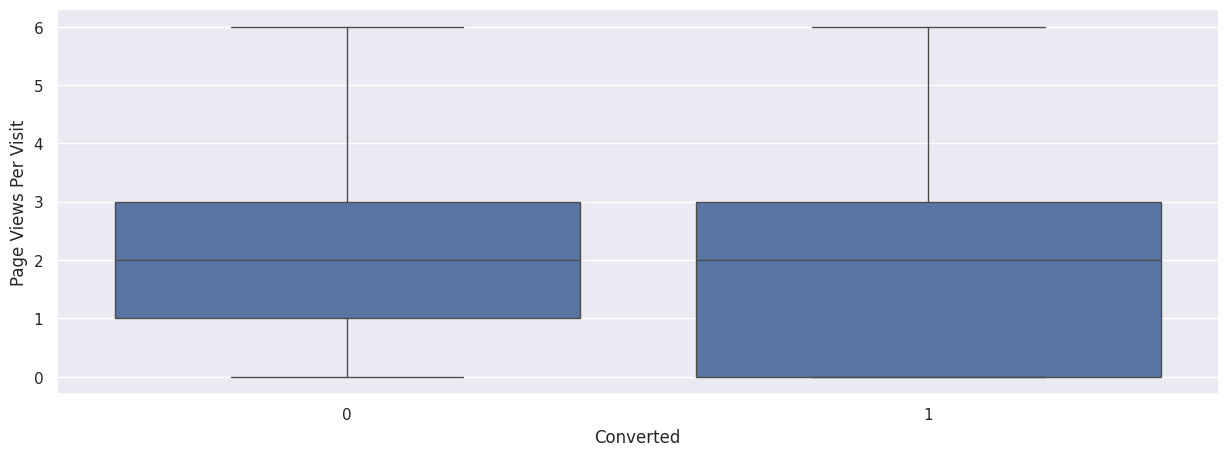

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

- Leads que visitan 1-3 páginas son personas con una duda razonable si aplicar o no. Estan 50/50.
- Leads que no visitan páginas tienen mayores chances de conversión, eso habla de su convencimiento.    

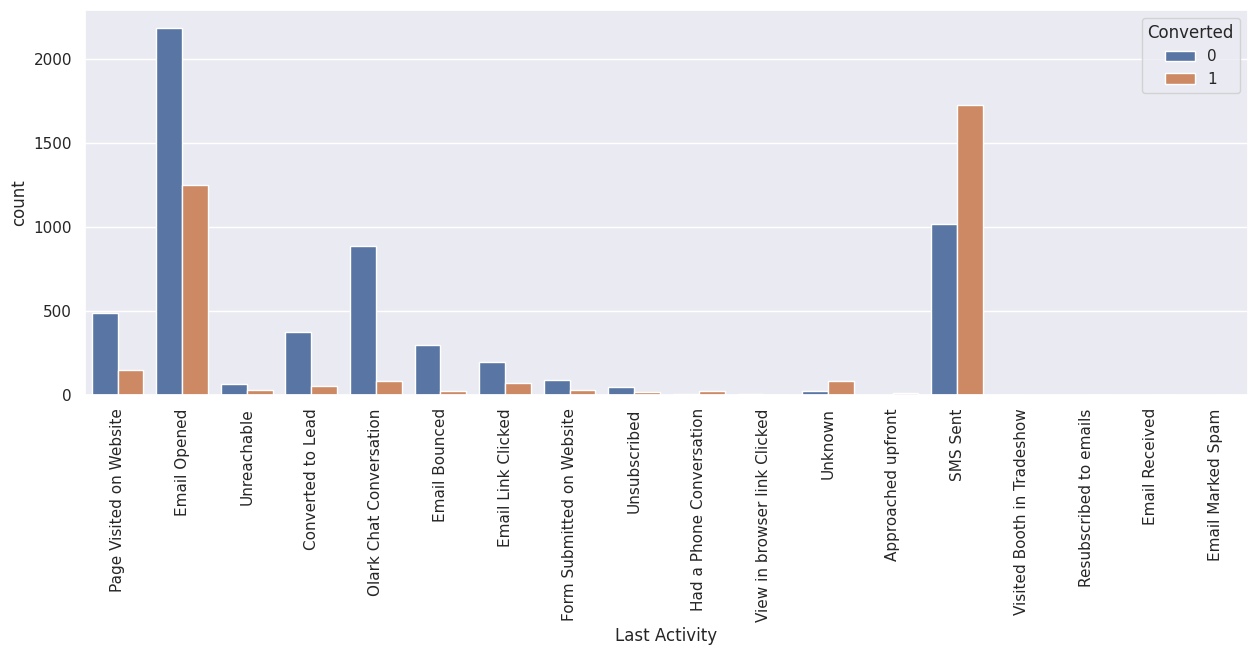

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

- La mayor cantidad de leads tienen como última actividad 'Email opened' y 'SMS sent'. Incluso tienen altos % de conversión. El del SMS es muy alto.
- 'Unknown' también tiene buenos porcentajes de conversión. Sería interesante tener más información sobre su última actividad.
- 'olark chat conversation' y 'Page Visited on Website' generan muchos leads pero convierten muy poco.



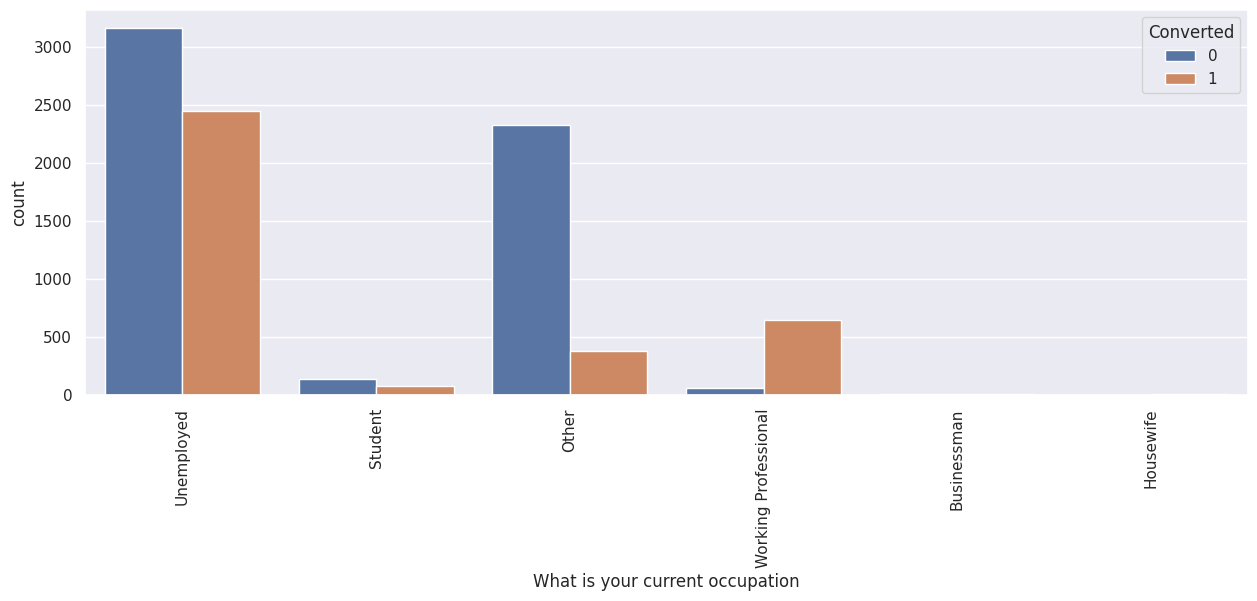

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

- 'Working Professionals' y 'Unemployed' generan muchos leads y convierten con un alto %.
- 'Working Professionals' convierte en un % muy alto.
- Deberían enfocarse en acciones sobre personas con un perfil profesional cualificado.



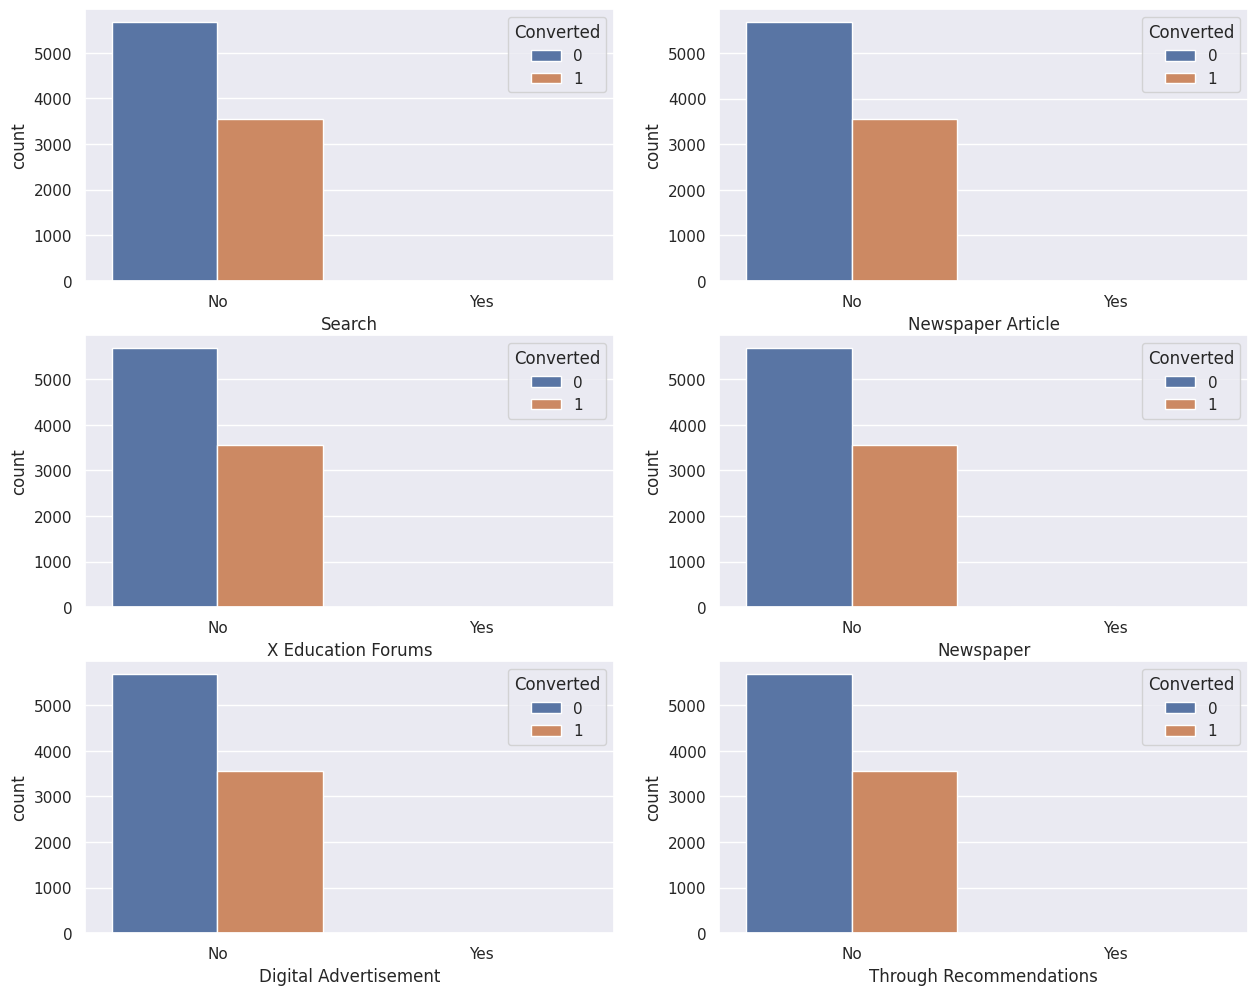

In [ ]:
# estudiamos el resto en conjunto
plt.figure(figsize=(15,12))

plt.subplot(3,2,1)
sns.countplot(x = "Search", hue = "Converted", data = leads_df)

plt.subplot(3,2,2)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df)

plt.subplot(3,2,3)
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df)

plt.subplot(3,2,4)
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df)

plt.subplot(3,2,5)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df)

plt.subplot(3,2,6)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df)

plt.show()

- Insights interesantes a nivel de negocio, pero poco útiles para el modelo. El 99% de las respuestas a estas preguntas no son relevantes para la toma de decisiones del modelo por lo que las podemos eliminar.

In [ ]:
leads_df = leads_df.drop(['Search',
                          'Newspaper Article',
                          'X Education Forums',
                          'Newspaper',
                          'Digital Advertisement',
                          'Through Recommendations'], axis=1)

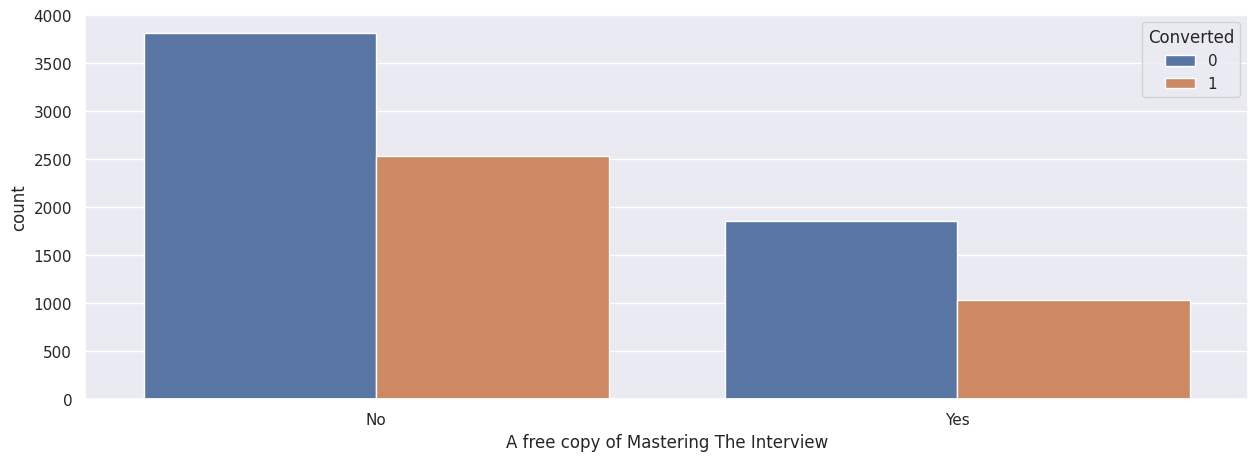

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_df)

plt.show()

- A diferencia de las otras preguntas, esta sí aporta conocimiento al modelo.
- Ratios de conversión similares para aquellos que la quisieron y aquellos que no.
    
   

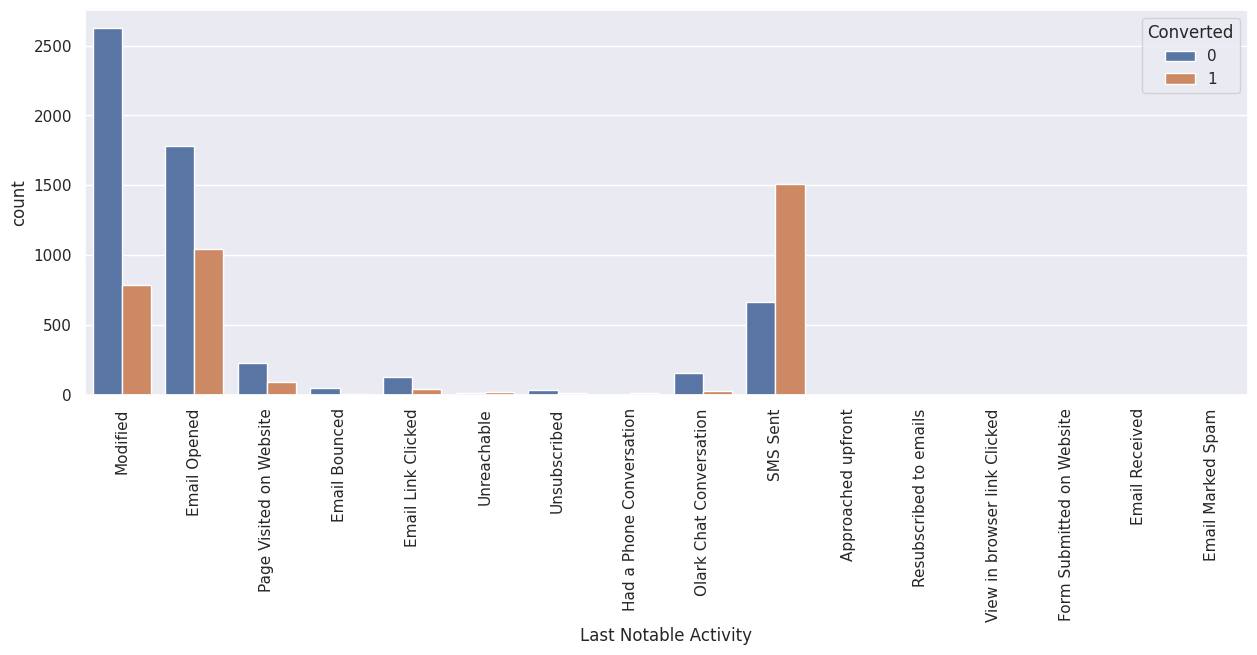

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

- Similar a 'Last activity', podemos quedaron con una

In [ ]:
leads_df = leads_df.drop('Last Notable Activity', axis=1)

In [ ]:
leads_df.shape

(9240, 12)

In [ ]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Tags,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Interested in other courses,No
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Ringing,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Will revert after reading the email,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,Ringing,No
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Will revert after reading the email,No


## Paso 4: Codificación de variables categóricas

In [ ]:
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview'],
      dtype='object')

Convertimos variables binarias (Yes/No) a 1/0

In [ ]:
# List of binary variables
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the map function to the binary variables list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

Hacemos un codificación de variables categóricas con un 'one-hot encoding', esto genera una explosión de variables. Pero que serán útiles para entrenar modelos.

In [ ]:
dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Tags','What is your current occupation']
dummy_data = pd.get_dummies(leads_df[dummy],drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# combinamos dummy data con el dataset original

leads_df = pd.concat([leads_df, dummy_data], axis=1)
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Tags,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Interested in other courses,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,Ringing,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,Will revert after reading the email,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,Ringing,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Will revert after reading the email,0,True,False,False,False,False,True,False,False,False,False,Fal

In [ ]:
# Quitamos las columnas originales
drop_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Tags','What is your current occupation']
leads_df = leads_df.drop(drop_cols, axis=1)
leads_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,0,0,0.0,0,0.0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,660728,0,0,5.0,674,2.5,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,660727,0,1,2.0,1532,2.0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3,660719,0,0,1.0,305,1.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,660681,0,1,2.0,1428,1.0,0,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# vemos la forma actual del dataset
leads_df.shape

(9240, 12)

Futuros pasos:
- Separamos train y test.
- Normalizamos y estandarizamos las variables.
- Armar modelos y hacer pruebas
- Estudiar performance del modelo
- Estudiar cómo generaliza el modelo